In [1]:
!nvidia-smi

Fri Oct 11 19:43:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.18                 Driver Version: 531.18       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650       WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   51C    P0               16W /  N/A|      5MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [10]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce GTX 1650
Using device: cuda


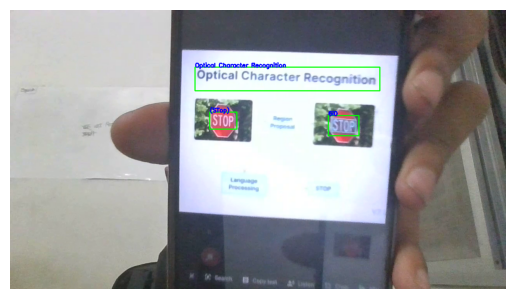

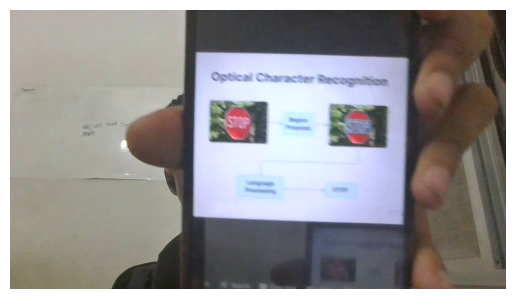

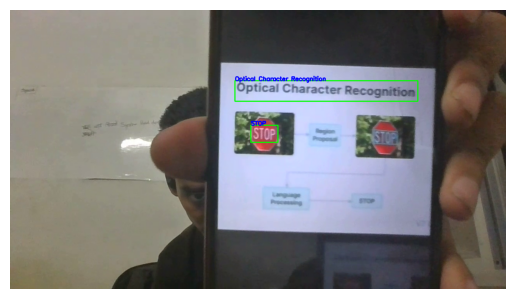

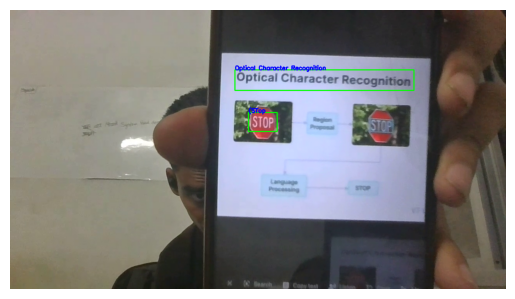

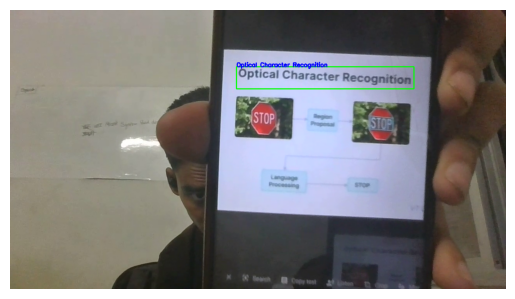

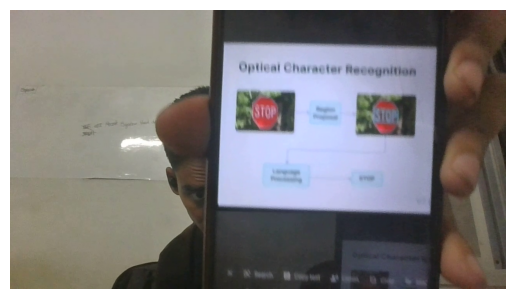

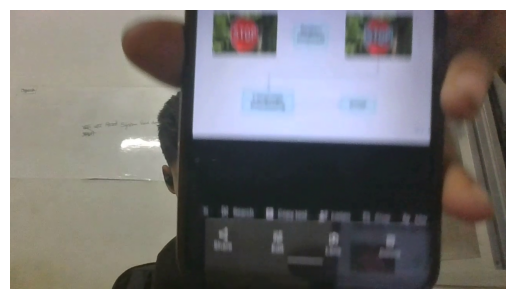

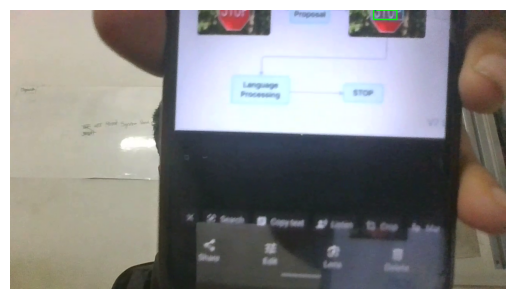

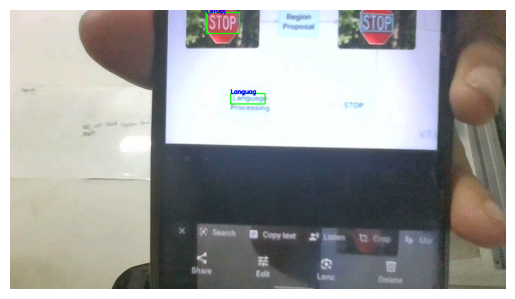

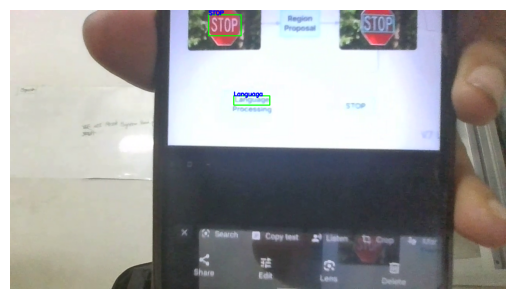

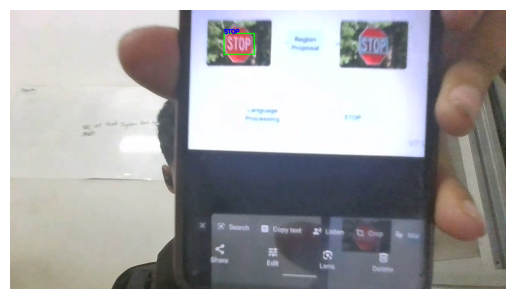

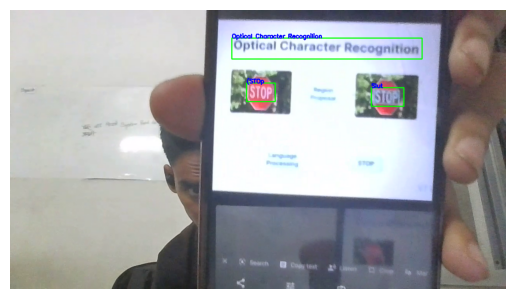

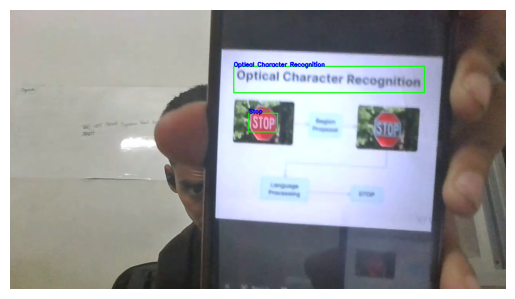

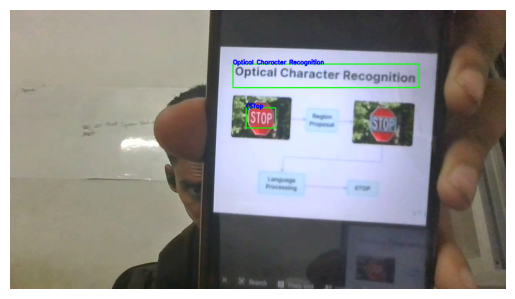

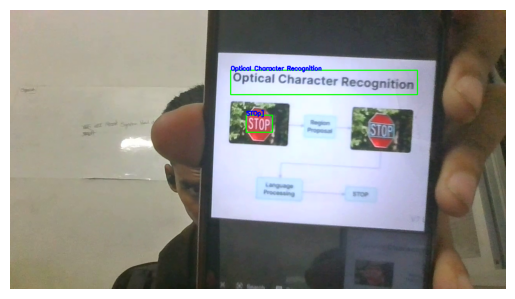

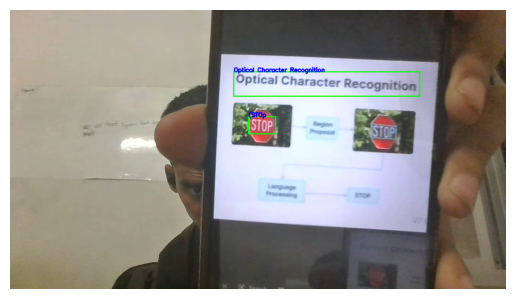

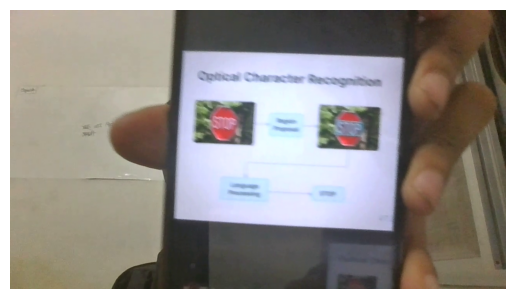

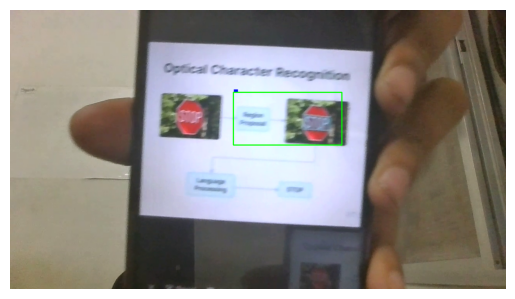

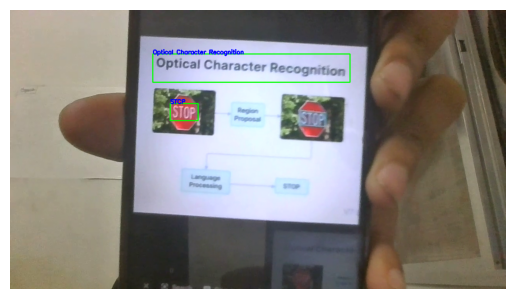

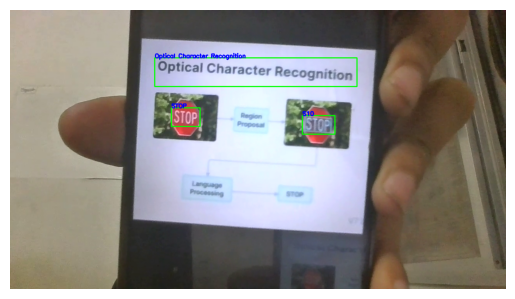

--------------------------------------------------
GPU MODE
Processed 198 number of frames in 12.29 seconds
FPS : 16.12


In [51]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import time

reader = easyocr.Reader(['en'], gpu = True)

video_path = "data/sample_video.mp4"
cap = cv2.VideoCapture(video_path)

frame_rate = 10
frame_count = 0

start_time = time.time()
while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break
    
    if frame_count % frame_rate == 0:
        text_ = reader.readtext(frame)

        for bbox, text, score in text_:
            if score > 0.25:
                cv2.rectangle(frame, tuple(map(int, bbox[0])), tuple(map(int, bbox[2])), (0,255,0), 2)
                cv2.putText(frame, text, tuple(map(int, bbox[0])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
                #cv2.rectangle(frame, text, (x1,y1), (x2,y2), (0,255,0), 2)
                #cv2.putText(frame, text, (x1,y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
            
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.savefig(fname = f"out/gpu/output{frame_count}.png")
        plt.show()
        

    frame_count += 1

cap.release()
end_time = time.time()

elapsed = end_time - start_time
fps = frame_count / elapsed

print(50*"-")
print("GPU MODE")
print(f"Processed {frame_count} number of frames in {elapsed:.2f} seconds")
print(f"FPS : {fps:.2f}")

Using CPU. Note: This module is much faster with a GPU.


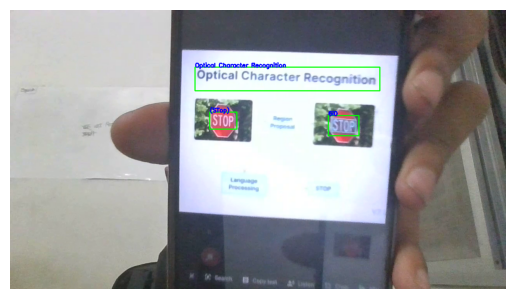

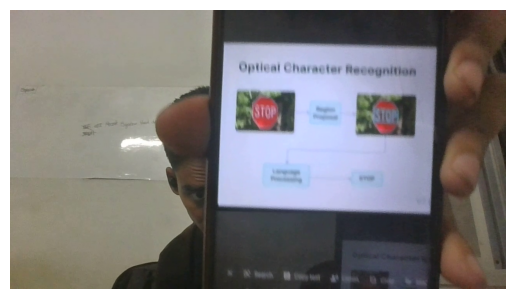

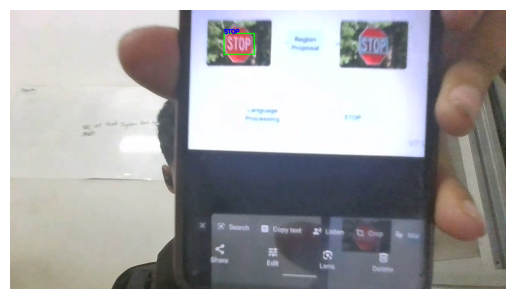

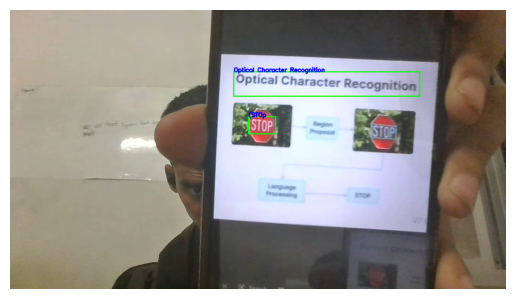

--------------------------------------------------
CPU MODE
Processed 198 number of frames in 15.82 seconds
FPS : 12.51


In [52]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import time

reader = easyocr.Reader(['en'], gpu = False)

video_path = "data/sample_video.mp4"
cap = cv2.VideoCapture(video_path)

frame_rate = 50
frame_count = 0

start_time = time.time()
while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break
    
    if frame_count % frame_rate == 0:
        text_ = reader.readtext(frame)

        for bbox, text, score in text_:
            if score > 0.25:
                cv2.rectangle(frame, tuple(map(int, bbox[0])), tuple(map(int, bbox[2])), (0,255,0), 2)
                cv2.putText(frame, text, tuple(map(int, bbox[0])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
                #cv2.rectangle(frame, text, (x1,y1), (x2,y2), (0,255,0), 2)
                #cv2.putText(frame, text, (x1,y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
            
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.savefig(fname = f"out/cpu/output{frame_count}.png")
        plt.show()
        

    frame_count += 1

cap.release()
end_time = time.time()

elapsed = end_time - start_time
fps = frame_count / elapsed

print(50*"-")
print("CPU MODE")
print(f"Processed {frame_count} number of frames in {elapsed:.2f} seconds")
print(f"FPS : {fps:.2f}")